# PCA on Breast Ultra Sound Image

### Import packages

In [1]:
import os
import re
import random
from pathlib import Path
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.decomposition import PCA

from utils import init_img_dict, get_file_dicts, filter_files, find_mask, print_ndarray_info
from utils import img_read, img_write, img_resize, img_flip, comp_fft, histogram_equalization
from utils import display_img, display_img_list_3, display_3_imgs, display_3_hist, resize_imgs, flip_imgs, append_img_data

### Read image list (with dict object for each image) for the 3 classes

In [2]:
img_res = 512

normal_img_dir = './Dataset_BUSI_with_GT/normal_512'
benign_img_dir = './Dataset_BUSI_with_GT/benign_512'
malignant_img_dir = './Dataset_BUSI_with_GT/malignant_512'

# Get a list of images in the images directory
normal_img_list_all = get_file_dicts(normal_img_dir)
num_normal_img = len(normal_img_list_all)
print(f"Number of images in normal dataset: {num_normal_img}")

benign_img_list_all = get_file_dicts(benign_img_dir)
num_benign_img = len(benign_img_list_all)
print(f"Number of images in benign dataset: {num_benign_img}")

malignant_img_list_all = get_file_dicts(malignant_img_dir)
num_malignant_img = len(malignant_img_list_all)
print(f"Number of images in malignant dataset: {num_malignant_img}")

Number of images in normal dataset: 133
Number of images in benign dataset: 437
Number of images in malignant dataset: 420


### Perform PCA

In [3]:
# Prepare data for the PCA

# Select n random samples from each list to show
nsample = 128

benign_img_list = random.sample(benign_img_list_all, nsample)
malignant_img_list = random.sample(malignant_img_list_all, nsample)

In [4]:
img_data = np.empty((0, img_res*img_res), np.float32)

# read and append image data to img_data
img_data = append_img_data(benign_img_list, img_data)
img_data = append_img_data(malignant_img_list, img_data)

# create targets - 0 for benign and 1 for malignant
img_target = np.array([0]*nsample, dtype= np.int32)
img_target = np.append(img_target, np.array([1]*nsample, dtype= np.int32))

print(img_data.shape)
print(img_target.shape)

(256, 262144)
(256,)


In [5]:
# Visualize just 2 components to see if 2 components alone can differentiate between the classes
pca = PCA(2)  # project from img_res x img_res components to just 2 components
projected = pca.fit_transform(img_data)
print(img_data.shape)
print(projected.shape)

(256, 262144)
(256, 2)


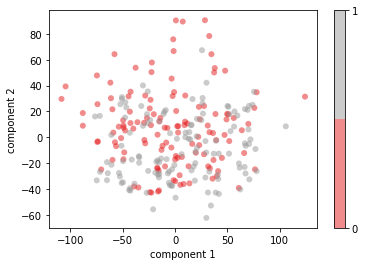

In [6]:
# Visualize the 2 PCA components against the 2 classes
plt.scatter(projected[:, 0], projected[:, 1],
            c=img_target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 2))
            #cmap=plt.cm.get_cmap('Spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(ticks=np.arange(0, 2))

103


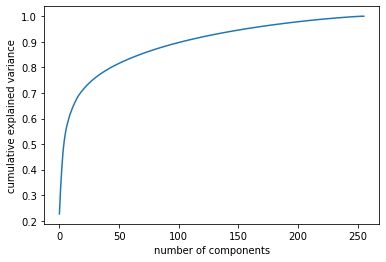

In [7]:
# How many components are required to explain 90% of variance. Visualize
pca = PCA().fit(img_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

variance = np.cumsum(pca.explained_variance_ratio_)
indices = np.argwhere(variance >= 0.9)
print(np.min(indices))